# Project: Writing a Data Scientists Blog Post

In this notebook I will be using sklearn and other ML learning libraries to analyse survey results.

# 1. Importing the data

In [66]:
import pandas as pd
import os
import glob
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings('ignore')

In [78]:
def load_year_from_csv(year):
    # defining the directory
    directory_path = os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    try:
        df = pd.read_csv(csv_files[0], sep=',', encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")

    return df

# creating a list of all the years we want to analise
years = ['2024', '2023', '2022', '2021',
         '2020', '2019', '2018', '2017']

data = []

for year in years:
    print('loading data for: ', year)
    data.append(load_year_from_csv(year));

loading data for:  2024
loading data for:  2023
loading data for:  2022
loading data for:  2021
loading data for:  2020
loading data for:  2019
loading data for:  2018
loading data for:  2017


In [68]:
# Verify that both lists have the same length
assert len(years) == len(data), "The lists must have the same length"

# Pair each string with its corresponding DataFrame
paired_list = zip(years, data)

# Convert the paired list to a dictionary
data_dict_raw = dict(paired_list)

# 2. Identify Common Survey questions

In order to get an overview of the consistency of the survey over the years, we want to identify common questions and similarities over the years.

In [73]:
def bar_column_names(df_dict, years):
    # Extract column names
    column_names = {year: set(data.columns) for year, data in df_dict.items()}

    # Find columns common to all DataFrames
    common_columns = set.intersection(*column_names.values())

    # Extract column names for the selected years
    all_columns_selected_years = []
    for year in years:
        if year in df_dict:
            all_columns_selected_years.extend(df_dict[year].columns)

    # # Remove duplicates by converting the list to a set and back to a list
    # all_columns_selected_years = list(set(all_columns_selected_years))

    # Count the frequency of each column name
    column_counter_selected_years = Counter(all_columns_selected_years)

    # Select the 20 most common columns between the years of the survey
    top_30_columns = column_counter_selected_years.most_common(30)

    # Separate keys and values for plotting
    labels, values = zip(*top_30_columns)

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Items')
    plt.title('Top 20 Items in Counter')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest count at the top
    plt.tight_layout()
    plt.show()

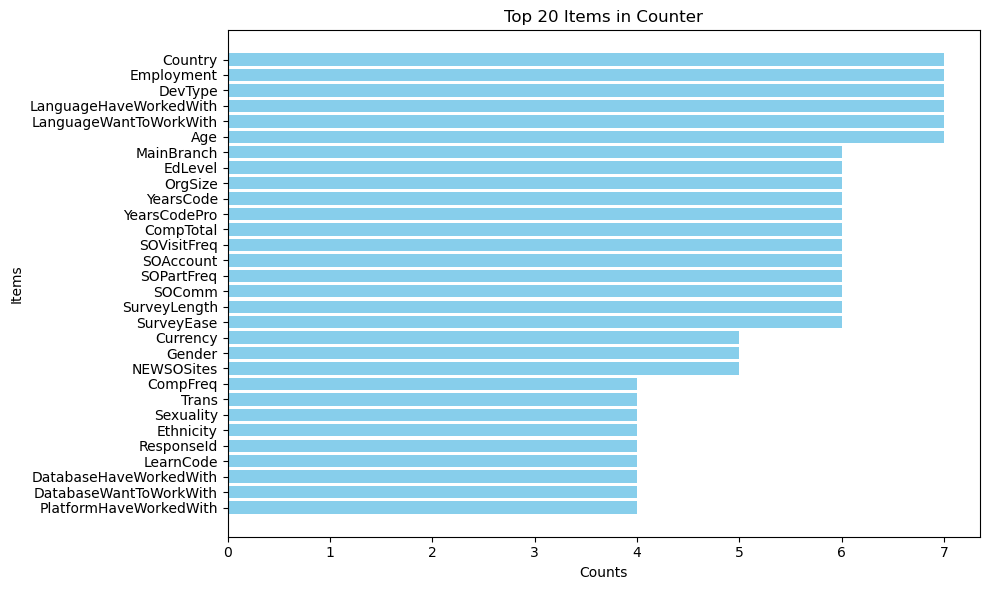

In [74]:
# Define the years for which you want to extract column names
selected_years = years[-7:]

# plot a bar chart of the most common column names
bar_column_names(data_dict_raw, selected_years)

In [75]:
data_dict = data_dict_raw

# renaming interesting columns in the 2020 dataframe for consistency over the years
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2020'] = data_dict['2020'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# renaming interesting columns in the 2019 dataframe for consistency over the years
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2019'] = data_dict['2019'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

# renaming interesting columns in the 2018 dataframe for consistency over the years
data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageWorkedWith': 'LanguageHaveWorkedWith'})
data_dict['2018'] = data_dict['2018'].rename(columns={'LanguageDesireNextYear': 'LanguageWantToWorkWith'})

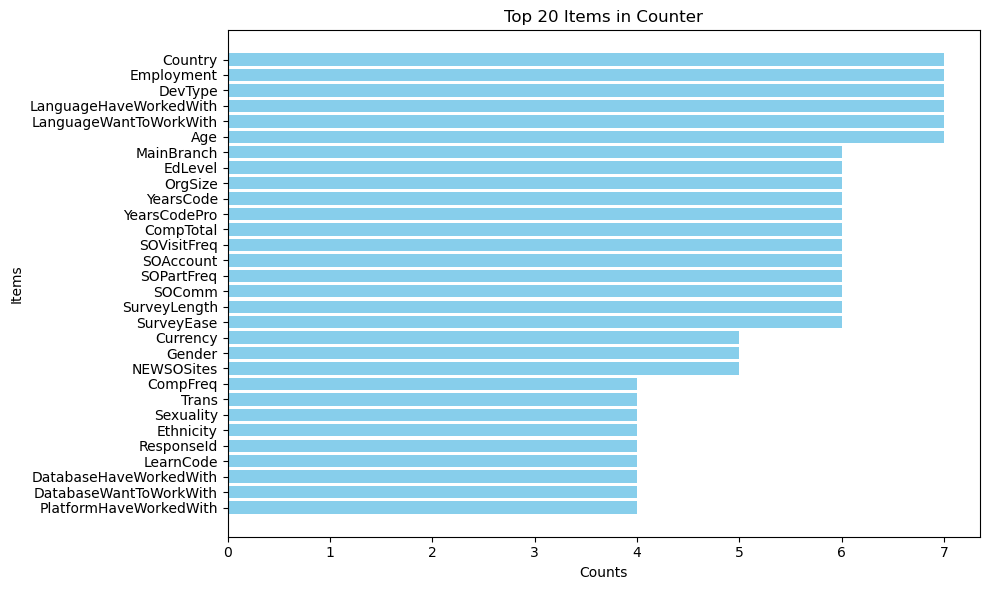

In [77]:
# plot a bar chart of the most common column names
bar_column_names(data_dict, selected_years)

In [88]:
# check which years yield a certain column name 
for year in data_dict:
    if sum(data_dict[year].columns == 'MainBranch'):
        print(year)


2019
2020
2021
2022
2023
2024
